# Continuous Control

---

### 1. Start the Environment

In [1]:
from unityagents import UnityEnvironment
import numpy as np

import torch
from collections import deque 
import matplotlib.pyplot as plt 
%matplotlib inline

from ddpg_agent import Agent

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment('Reacher20_Linux/Reacher.x86_64')   # Linux
#env = UnityEnvironment('Reacher20.app')                              # OSX

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [4]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.0944999978877604


When finished, you can close the environment.

In [5]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [6]:
random_seed = 20
actor_fc1_units, actor_fc2_units, critic_fcs1_units, critic_fc2_units = 256, 128, 256, 128
agent = Agent(state_size=state_size, action_size=action_size, random_seed=random_seed, num_agents=num_agents, actor_fc1_units=actor_fc1_units, actor_fc2_units=actor_fc2_units, critic_fc1_units=critic_fcs1_units, critic_fc2_units=critic_fc2_units)

In [7]:
def ddpg(n_episodes=1000, max_t=1000):
    scores_deque = deque(maxlen=100)
    scores = []         # average score history for each episode

    max_score = -np.Inf
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        
        agent.reset()  
        episode_scores = np.zeros(num_agents)
        
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(t, states, actions, rewards, next_states, dones)
            states = next_states
            episode_scores += rewards
            
            if np.any(dones):
                break 
    
        avg_episode_score = np.mean(episode_scores)  
        scores_deque.append(avg_episode_score)             
        scores.append(avg_episode_score)                       
        
        avg_score = np.mean(scores_deque)                     
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, avg_score), end="")  
        
        if i_episode % 100 == 0:      # Save model every 100 episode
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, avg_score)) 
            
        if avg_score > 30.0:
            torch.save(agent.actor_local.state_dict(), 'solved_checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'solved_checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}\tProblem Solved!'.format(i_episode, avg_score))               
            
    return scores

In [8]:
def plot_scores(scores):
    # Plot the scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(1, len(scores)+1), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

Episode 100	Average Score: 8.56
Episode 200	Average Score: 19.68
Episode 300	Average Score: 27.92
Episode 366	Average Score: 30.01	Problem Solved!
Episode 367	Average Score: 30.06	Problem Solved!
Episode 368	Average Score: 30.11	Problem Solved!
Episode 369	Average Score: 30.14	Problem Solved!
Episode 370	Average Score: 30.16	Problem Solved!
Episode 371	Average Score: 30.22	Problem Solved!
Episode 372	Average Score: 30.28	Problem Solved!
Episode 373	Average Score: 30.31	Problem Solved!
Episode 374	Average Score: 30.36	Problem Solved!
Episode 375	Average Score: 30.41	Problem Solved!
Episode 376	Average Score: 30.45	Problem Solved!
Episode 377	Average Score: 30.49	Problem Solved!
Episode 378	Average Score: 30.53	Problem Solved!
Episode 379	Average Score: 30.57	Problem Solved!
Episode 380	Average Score: 30.59	Problem Solved!
Episode 381	Average Score: 30.61	Problem Solved!
Episode 382	Average Score: 30.65	Problem Solved!
Episode 383	Average Score: 30.65	Problem Solved!
Episode 384	Average 

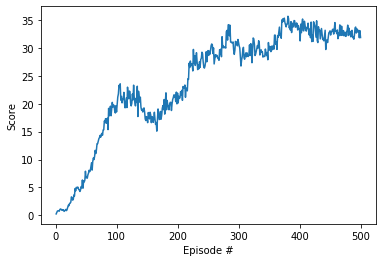

In [9]:
scores = ddpg(500, 1000)
plot_scores(scores)